# Repression Efficiency Comparison

Compare intended target repression across datasets:
- auROC/auPRC barplots
- FC violin plots with medians
- Log2FC scatter/heatmaps

**Input:** `latest_qc_paths.tsv`  
**Output:** Combined results TSVs and comparison plots

In [17]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [18]:
# Project root
PROJECT_ROOT = Path("/Users/adamklie/Desktop/projects/tf_perturb_seq")

# Add config to path for color loader
sys.path.append(str(PROJECT_ROOT / "config"))
from loader import load_colors

dataset_colors = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_colors")
dataset_order = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_order")

In [19]:
# Paths
BASE_DIR = PROJECT_ROOT / "datasets" / "technology-benchmark_WTC11_TF-Perturb-seq"
QC_PATHS_FILE = BASE_DIR / "latest_qc_paths.tsv"
OUTPUT_DIR = BASE_DIR / "results" / "cross_tech_comparison"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Reading paths from: {QC_PATHS_FILE}")
print(f"Output directory: {OUTPUT_DIR}")

Reading paths from: /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/latest_qc_paths.tsv
Output directory: /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison


In [20]:
# Load the paths manifest
paths_df = pd.read_csv(QC_PATHS_FILE, sep="\t")
paths_df

,dataset,qc_dir,gene_metrics,guide_metrics,intended_target_results,intended_target_metrics,trans_results,trans_metrics
0,Hon_WTC11-benchmark_TF-Perturb-seq,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Hon_WTC11-benchmark_gene_metrics.tsv,mapping_guide/Hon_WTC11-benchmark_guide_metric...,intended_target/Hon_WTC11-benchmark_intended_t...,intended_target/Hon_WTC11-benchmark_intended_t...,trans/Hon_WTC11-benchmark_trans_results.tsv,trans/Hon_WTC11-benchmark_trans_metrics.tsv
1,Huangfu_WTC11-benchmark_TF-Perturb-seq,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Huangfu_WTC11-benchmark_TF-Pertur...,mapping_guide/Huangfu_WTC11-benchmark_TF-Pertu...,intended_target/Huangfu_WTC11-benchmark_TF-Per...,intended_target/Huangfu_WTC11-benchmark_TF-Per...,trans/Huangfu_WTC11-benchmark_TF-Perturb-seq_t...,trans/Huangfu_WTC11-benchmark_TF-Perturb-seq_t...
2,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Gersbach_WTC11-benchmark_TF-Pertu...,mapping_guide/Gersbach_WTC11-benchmark_TF-Pert...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...
3,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Gersbach_WTC11-benchmark_TF-Pertu...,mapping_guide/Gersbach_WTC11-benchmark_TF-Pert...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...


## Intended Target Metrics (auROC/auPRC)

In [21]:
# Load intended target metrics (auROC, auPRC, etc.)
metrics_list = []
for _, row in paths_df.iterrows():
    metrics_path = Path(row['qc_dir']) / row['intended_target_metrics']
    if metrics_path.exists():
        df = pd.read_csv(metrics_path, sep="\t")
        df['dataset'] = row['dataset']
        metrics_list.append(df)
    else:
        print(f"Warning: {metrics_path} not found")

metrics_df = pd.concat(metrics_list, ignore_index=True)
metrics_df['dataset'] = pd.Categorical(metrics_df['dataset'], categories=dataset_order, ordered=True)
metrics_df = metrics_df.sort_values('dataset')
metrics_df

,n_guides_total,n_guides_tested,fc_threshold,log2fc_threshold,pval_threshold,n_strong_knockdowns,n_significant,n_strong_and_significant,frac_strong_knockdowns,frac_significant,frac_strong_and_significant,median_log2fc,mean_log2fc,auroc,auprc,n_eval_positives,n_eval_negatives,dataset
0,416,242,0.4,-1.321928,0.05,26,148,25,0.107438,0.611570,0.103306,-0.495552,-0.587753,0.767519,0.813229,242,242,Hon_WTC11-benchmark_TF-Perturb-seq
1,416,246,0.4,-1.321928,0.05,61,165,61,0.247967,0.670732,0.247967,-0.710894,-0.816509,0.851097,0.884488,246,246,Huangfu_WTC11-benchmark_TF-Perturb-seq
2,416,260,0.4,-1.321928,0.05,58,191,57,0.223077,0.734615,0.219231,-0.733098,-0.801227,0.849231,0.894671,260,260,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3
3,416,302,0.4,-1.321928,0.05,14,107,14,0.046358,0.354305,0.046358,-0.265651,-0.354826,0.643711,0.697585,302,302,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2


In [22]:
# Save combined metrics
metrics_df.to_csv(OUTPUT_DIR / "combined_intended_target_metrics.tsv", sep="\t", index=False)
print(f"Saved to {OUTPUT_DIR / 'combined_intended_target_metrics.tsv'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/combined_intended_target_metrics.tsv


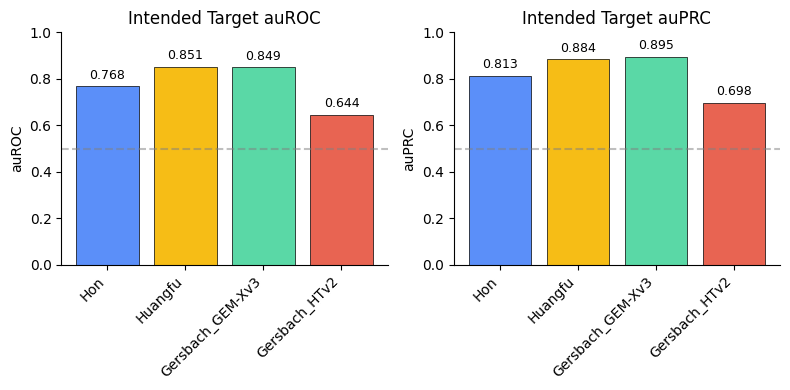

In [23]:
# auROC and auPRC barplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for ax, (col, title) in zip(axes, [('auroc', 'auROC'), ('auprc', 'auPRC')]):
    colors = [dataset_colors.get(ds, 'gray') for ds in metrics_df['dataset']]
    bars = ax.bar(range(len(metrics_df)), metrics_df[col], color=colors, edgecolor='black', linewidth=0.5)
    ax.set_xticks(range(len(metrics_df)))
    ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in metrics_df['dataset']], 
                       rotation=45, ha='right')
    ax.set_ylabel(title)
    ax.set_title(f'Intended Target {title}')
    ax.set_ylim(0, 1)
    ax.axhline(0.5, color='gray', linestyle='--', alpha=0.5, label='Random')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add values on bars
    for i, v in enumerate(metrics_df[col]):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "auroc_auprc_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Intended Target Results (per-guide FC)

In [24]:
# Load intended target results (per-guide log2FC, p-values)
results_list = []
for _, row in paths_df.iterrows():
    results_path = Path(row['qc_dir']) / row['intended_target_results']
    if results_path.exists():
        df = pd.read_csv(results_path, sep="\t")
        df['dataset'] = row['dataset']
        results_list.append(df)
    else:
        print(f"Warning: {results_path} not found")

results_df = pd.concat(results_list, ignore_index=True)
results_df.head()

,guide_id,gene_name,label,log2_fc,p_value,dataset
0,CD81#strong,CD81,positive_control,-1.238206,1.954897e-50,Hon_WTC11-benchmark_TF-Perturb-seq
1,CD81#weak,CD81,positive_control,-1.263598,2.706037e-120,Hon_WTC11-benchmark_TF-Perturb-seq
2,CD151#strong,CD151,positive_control,-1.550770,1.045843e-91,Hon_WTC11-benchmark_TF-Perturb-seq
3,CD151#weak,CD151,positive_control,-1.199014,1.567641e-90,Hon_WTC11-benchmark_TF-Perturb-seq
4,CD55#strong,CD55,positive_control,-1.706344,1.891810e-31,Hon_WTC11-benchmark_TF-Perturb-seq


In [25]:
# Standardize column names if needed
if 'perturbo_log2_fc' in results_df.columns:
    results_df = results_df.rename(columns={'perturbo_log2_fc': 'log2_fc', 'perturbo_p_value': 'p_value'})

# Add lab shorthand
results_df['lab'] = results_df['dataset'].str.replace('_WTC11-benchmark_TF-Perturb-seq', '', regex=False)

# Calculate FC from log2FC
results_df['fc'] = 2 ** results_df['log2_fc']

results_df.head()

,guide_id,gene_name,label,log2_fc,p_value,dataset,lab,fc
0,CD81#strong,CD81,positive_control,-1.238206,1.954897e-50,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,0.423899
1,CD81#weak,CD81,positive_control,-1.263598,2.706037e-120,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,0.416504
2,CD151#strong,CD151,positive_control,-1.550770,1.045843e-91,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,0.341328
3,CD151#weak,CD151,positive_control,-1.199014,1.567641e-90,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,0.435573
4,CD55#strong,CD55,positive_control,-1.706344,1.891810e-31,Hon_WTC11-benchmark_TF-Perturb-seq,Hon,0.306436


In [26]:
# Save combined results
results_df.to_csv(OUTPUT_DIR / "combined_intended_target_results.tsv", sep="\t", index=False)
print(f"Saved to {OUTPUT_DIR / 'combined_intended_target_results.tsv'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/combined_intended_target_results.tsv


In [27]:
# Remove guides that are NaN across all datasets
nan_guides = results_df.groupby('guide_id')['log2_fc'].apply(lambda x: x.isna().all())
nan_guides = nan_guides[nan_guides].index.tolist()
print(f"Removing {len(nan_guides)} guides with all-NaN values")

results_clean = results_df[~results_df['guide_id'].isin(nan_guides)].copy()
results_clean['dataset'] = pd.Categorical(results_clean['dataset'], categories=dataset_order, ordered=True)

Removing 114 guides with all-NaN values


## FC Violin Plots

/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_37898/624759808.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in dataset_order], rotation=45, ha='right')


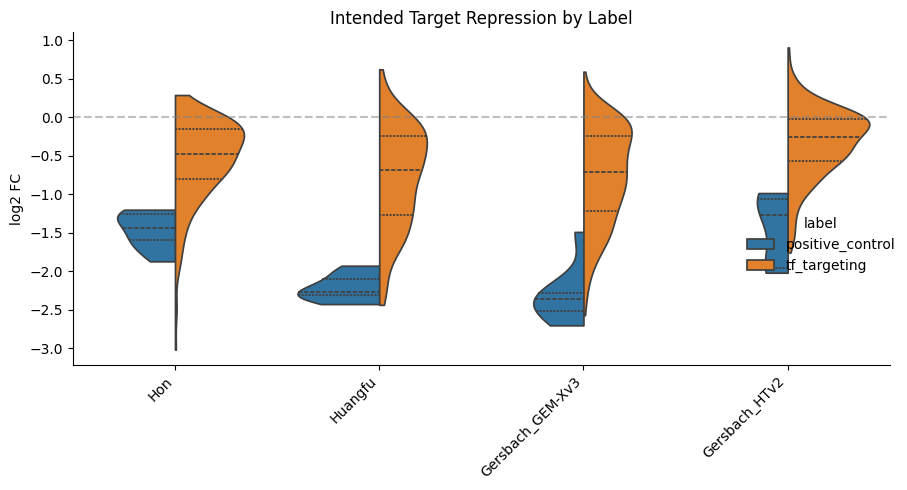

In [28]:
# Violin plot of log2FC by dataset and label
plot_df = results_clean[results_clean['label'].isin(['positive_control', 'tf_targeting'])].copy()

g = sns.catplot(
    data=plot_df,
    x='dataset',
    y='log2_fc',
    hue='label',
    kind='violin',
    order=dataset_order,
    height=5,
    aspect=1.5,
    inner='quartile',
    split=True,
    cut=0,
)

g.ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
g.ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in dataset_order], rotation=45, ha='right')
g.ax.set_ylabel('log2 FC')
g.ax.set_xlabel('')
g.ax.set_title('Intended Target Repression by Label')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "log2fc_violin_by_label.pdf", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_37898/1894295807.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_37898/1894295807.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = pos_ctrl.groupby('dataset')['fc'].median().reindex(dataset_order)
/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_37898/1894295807.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in dataset_order], rotation=45

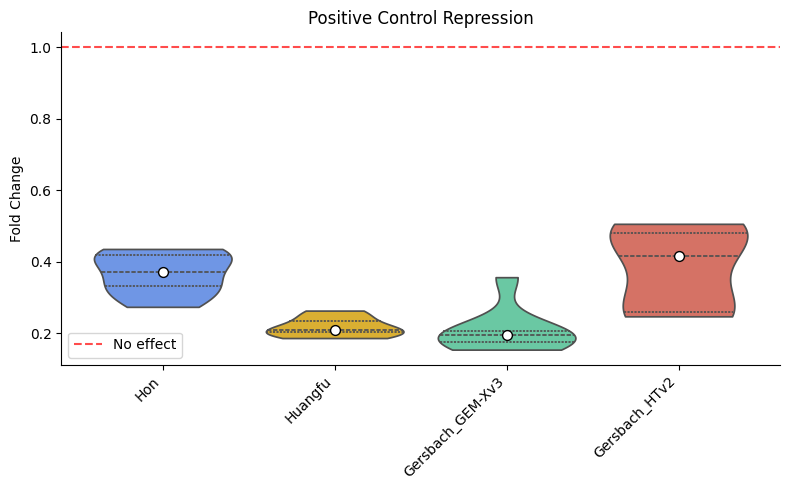

In [29]:
# Violin plot of FC for positive controls only
pos_ctrl = results_clean[results_clean['label'] == 'positive_control'].copy()

fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(
    data=pos_ctrl,
    x='dataset',
    y='fc',
    order=dataset_order,
    palette=dataset_colors,
    inner='quartile',
    cut=0,
    ax=ax
)

# Add medians as points
medians = pos_ctrl.groupby('dataset')['fc'].median().reindex(dataset_order)
for i, (ds, med) in enumerate(medians.items()):
    ax.scatter(i, med, color='white', s=50, zorder=3, edgecolor='black')

ax.axhline(1, color='red', linestyle='--', alpha=0.7, label='No effect')
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in dataset_order], rotation=45, ha='right')
ax.set_ylabel('Fold Change')
ax.set_xlabel('')
ax.set_title('Positive Control Repression')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "fc_violin_positive_controls.pdf", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_37898/4066332543.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = pos_ctrl.groupby('dataset')['fc'].median().reindex(dataset_order)


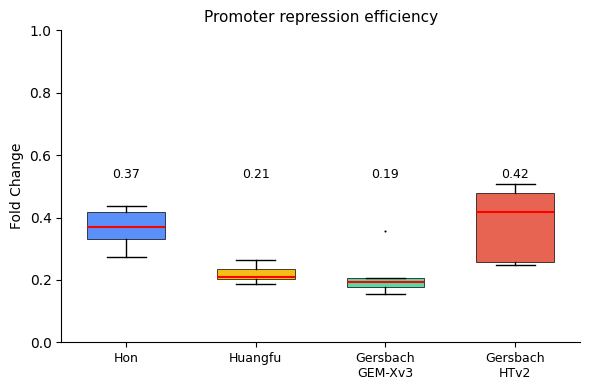

In [31]:
# Simple boxplot of positive control repression efficiency
pos_ctrl = results_clean[results_clean['label'] == 'positive_control'].copy()

fig, ax = plt.subplots(figsize=(6, 4))

# Create boxplot
bp = ax.boxplot(
    [pos_ctrl[pos_ctrl['dataset'] == ds]['fc'].dropna() for ds in dataset_order],
    positions=range(len(dataset_order)),
    widths=0.6,
    patch_artist=True,
    medianprops=dict(color='red', linewidth=1.5),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='.', markersize=3, markerfacecolor='black', markeredgecolor='none')
)

# Color boxes by dataset
for patch, ds in zip(bp['boxes'], dataset_order):
    patch.set_facecolor(dataset_colors[ds])
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Add median values at top
medians = pos_ctrl.groupby('dataset')['fc'].median().reindex(dataset_order)
ymax = pos_ctrl['fc'].max()
for i, (ds, med) in enumerate(medians.items()):
    ax.text(i, ymax * 1.02, f'{med:.2f}', ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_xticks(range(len(dataset_order)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '').replace('_', '\n') 
                    for ds in dataset_order], fontsize=9)
ax.set_ylabel('Fold Change', fontsize=10)
ax.set_title('Promoter repression efficiency', fontsize=11)
ax.set_ylim(0, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "repression_efficiency_boxplot.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Pairwise Log2FC Scatter Plots

In [32]:
# Build pairwise scatter data
pair_data = {}
n = len(dataset_order)

for i, ds2 in enumerate(dataset_order):
    d2 = results_clean.loc[results_clean['dataset'] == ds2, ['guide_id', 'log2_fc']].rename(columns={'log2_fc': 'y'})
    for j, ds1 in enumerate(dataset_order):
        if i <= j:
            continue
        d1 = results_clean.loc[results_clean['dataset'] == ds1, ['guide_id', 'log2_fc']].rename(columns={'log2_fc': 'x'})
        m = d1.merge(d2, on='guide_id', how='inner').dropna(subset=['x', 'y'])
        r = np.nan if m.empty else np.corrcoef(m['x'], m['y'])[0, 1]
        pair_data[(i, j)] = {'df': m, 'r': r}

# Global limits
all_vals = np.concatenate([v['df'][['x', 'y']].to_numpy().ravel() for v in pair_data.values() if not v['df'].empty])
lo, hi = np.nanpercentile(all_vals, [0.5, 99.5])
pad = 0.05 * (hi - lo)
lo -= pad
hi += pad

/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_37898/2396060099.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


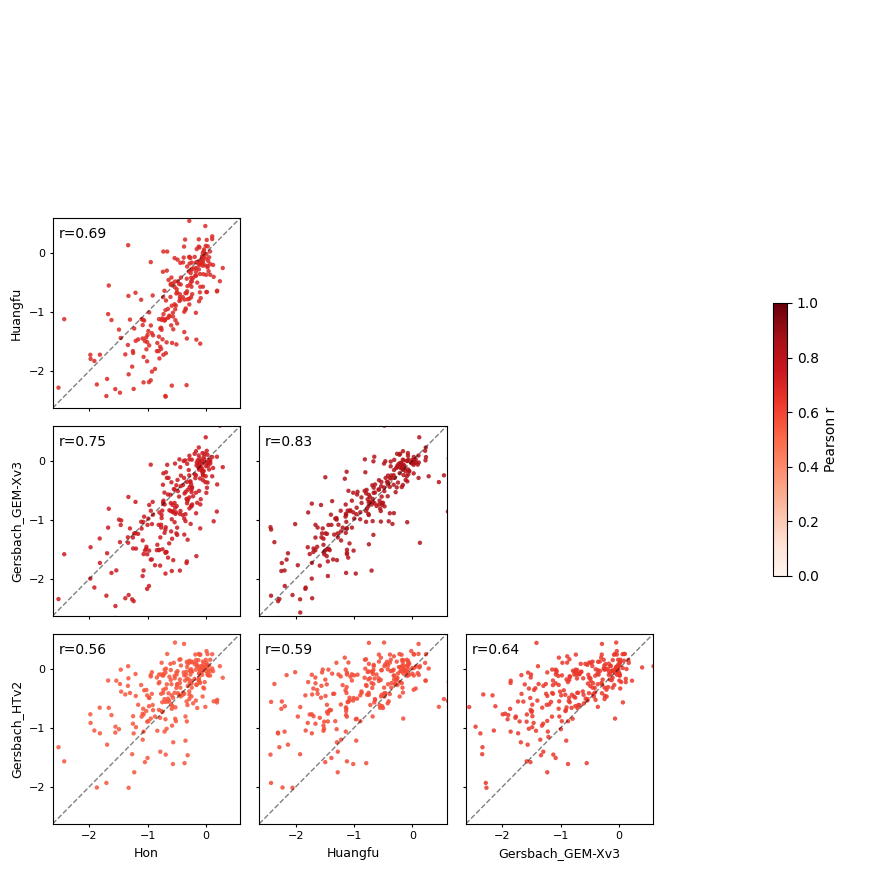

In [33]:
# Draw pairwise scatter grid
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = plt.cm.Reds

fig, axes = plt.subplots(n, n, figsize=(2.2*n, 2.2*n), sharex=True, sharey=True)

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        if i <= j:
            ax.set_axis_off()
            continue

        entry = pair_data[(i, j)]
        m = entry['df']
        r = entry['r']

        panel_color = (0.9, 0.9, 0.9, 1.0) if np.isnan(r) else cmap(norm(np.clip(r, 0, 1)))

        if not m.empty:
            ax.scatter(m['x'], m['y'], s=10, alpha=0.85, edgecolor='none', color=panel_color)

        ax.plot([lo, hi], [lo, hi], linestyle='--', linewidth=1, color='k', alpha=0.5)
        ax.set_xlim(lo, hi)
        ax.set_ylim(lo, hi)

        if not np.isnan(r):
            ax.text(0.03, 0.95, f'r={r:.2f}', transform=ax.transAxes, va='top', ha='left')

        ax.tick_params(length=2, labelsize=8)

# Add labels
suffix = '_WTC11-benchmark_TF-Perturb-seq'
for i in range(1, n):
    axes[i, 0].set_ylabel(dataset_order[i].replace(suffix, ''), fontsize=9)
for j in range(n-1):
    axes[n-1, j].set_xlabel(dataset_order[j].replace(suffix, ''), fontsize=9)

# Colorbar
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, fraction=0.02, pad=0.02)
cbar.set_label('Pearson r')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "log2fc_pairwise_scatter.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Correlation Heatmap

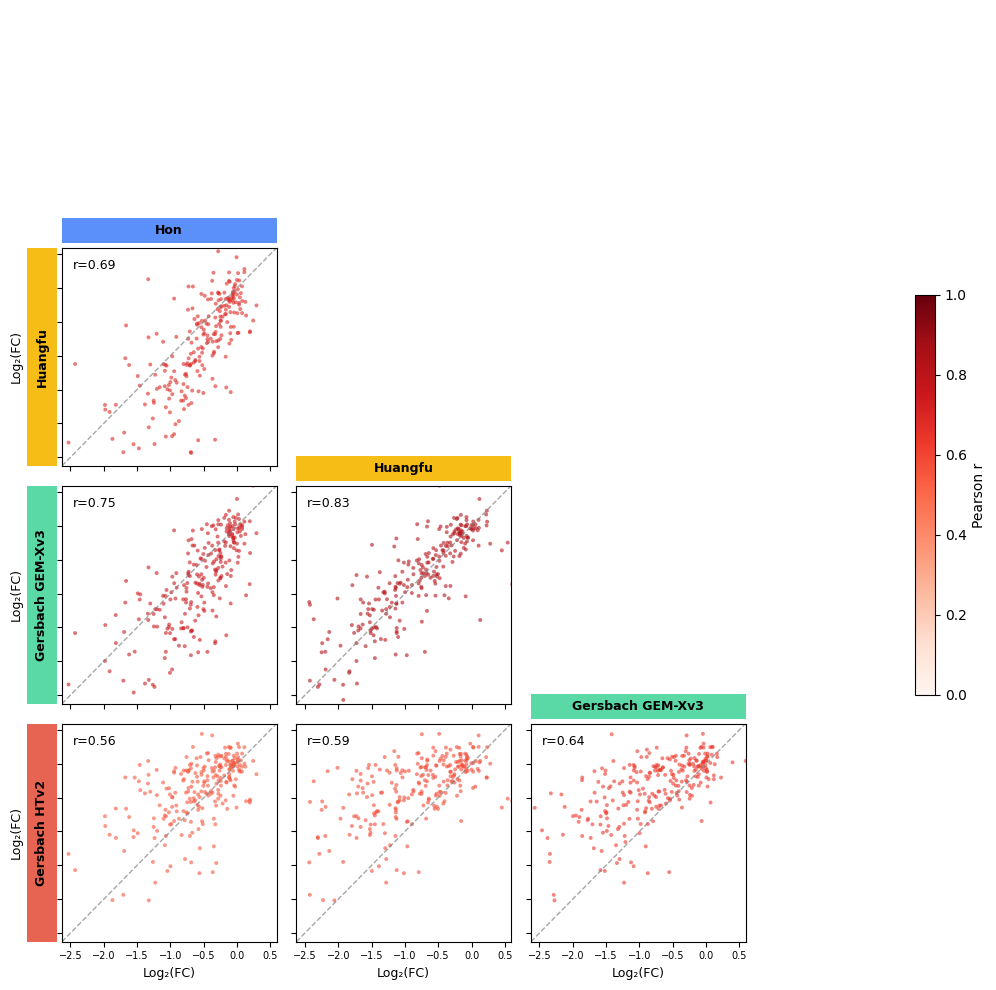

In [39]:
# Pairwise scatter matrix with colored dataset labels on rows and columns
from matplotlib.patches import Rectangle

suffix = '_WTC11-benchmark_TF-Perturb-seq'
def short_name(ds):
    return ds.replace(suffix, '').replace('_', ' ')

n = len(dataset_order)
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = plt.cm.Reds

fig, axes = plt.subplots(n, n, figsize=(2.5*n, 2.5*n))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        
        # Upper triangle and diagonal - hide
        if i <= j:
            ax.set_axis_off()
            continue
        
        # Lower triangle - scatter plot
        entry = pair_data[(i, j)]
        m = entry['df']
        r = entry['r']
        
        # Color points by correlation
        point_color = cmap(norm(np.clip(r, 0, 1))) if not np.isnan(r) else 'gray'
        
        if not m.empty:
            ax.scatter(m['x'], m['y'], s=8, alpha=0.6, edgecolor='none', color=point_color)
        
        # Diagonal line
        ax.plot([lo, hi], [lo, hi], linestyle='--', linewidth=1, color='gray', alpha=0.7)
        ax.set_xlim(lo, hi)
        ax.set_ylim(lo, hi)
        
        # Correlation annotation
        if not np.isnan(r):
            ax.text(0.05, 0.95, f'r={r:.2f}', transform=ax.transAxes, 
                   va='top', ha='left', fontsize=9)
        
        # Only show axis labels on edges
        if i == n - 1:
            ax.set_xlabel('Log₂(FC)', fontsize=9)
        else:
            ax.set_xticklabels([])
        
        if j == 0:
            ax.set_ylabel('Log₂(FC)', fontsize=9)
        else:
            ax.set_yticklabels([])
        
        ax.tick_params(labelsize=7)

plt.tight_layout()

# Add colored label strips after tight_layout
# Column labels (top) - for columns 0 to n-2
for j in range(n - 1):
    # Find the top-most scatter plot in this column (row = j+1)
    ax = axes[j + 1, j]
    bbox = ax.get_position()
    
    # Add colored rectangle above
    rect = fig.add_axes([bbox.x0, bbox.y1 + 0.005, bbox.width, 0.025])
    rect.set_xlim(0, 1)
    rect.set_ylim(0, 1)
    rect.add_patch(Rectangle((0, 0), 1, 1, facecolor=dataset_colors[dataset_order[j]], edgecolor='none'))
    rect.text(0.5, 0.5, short_name(dataset_order[j]), ha='center', va='center', fontsize=9, fontweight='bold')
    rect.axis('off')

# Row labels (left) - for rows 1 to n-1
for i in range(1, n):
    # Find the left-most scatter plot in this row (column = 0)
    ax = axes[i, 0]
    bbox = ax.get_position()
    
    # Add colored rectangle to the left
    rect = fig.add_axes([bbox.x0 - 0.035, bbox.y0, 0.03, bbox.height])
    rect.set_xlim(0, 1)
    rect.set_ylim(0, 1)
    rect.add_patch(Rectangle((0, 0), 1, 1, facecolor=dataset_colors[dataset_order[i]], edgecolor='none'))
    rect.text(0.5, 0.5, short_name(dataset_order[i]), ha='center', va='center', fontsize=9, fontweight='bold', rotation=90)
    rect.axis('off')

# Colorbar
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Pearson r', fontsize=10)

plt.savefig(OUTPUT_DIR / "log2fc_correlation_matrix.pdf", dpi=300, bbox_inches='tight')
plt.show()

---
# DONE!